In [1]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
from glob import glob

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic

In [4]:
directory = '/home/flanigan/temp/'

In [5]:
npy_files = sorted(glob('2017-02-1?_??????_centered.npd_loss.npy'))
npy_files

['2017-02-15_124211_centered.npd_loss.npy',
 '2017-02-15_140614_centered.npd_loss.npy',
 '2017-02-15_155457_centered.npd_loss.npy',
 '2017-02-15_163416_centered.npd_loss.npy',
 '2017-02-15_170842_centered.npd_loss.npy',
 '2017-02-15_182325_centered.npd_loss.npy',
 '2017-02-15_234604_centered.npd_loss.npy',
 '2017-02-16_073659_centered.npd_loss.npy',
 '2017-02-16_075930_centered.npd_loss.npy',
 '2017-02-16_081727_centered.npd_loss.npy',
 '2017-02-16_092616_centered.npd_loss.npy',
 '2017-02-16_121807_centered.npd_loss.npy',
 '2017-02-16_140100_centered.npd_loss.npy',
 '2017-02-16_143022_centered.npd_loss.npy',
 '2017-02-16_150908_centered.npd_loss.npy']

In [6]:
all_data = pd.concat([pd.DataFrame.from_records(np.load(f)) for f in npy_files], ignore_index=True).sort_values(by='stream_temperature_package')
all_data.shape

(225, 72)

In [7]:
all_data.columns

Index([u'index', u'S_counts', u'S_frequency', u'S_xx', u'S_xx_variance',
       u'S_xy', u'S_yy', u'S_yy_variance', u'analysis_epoch', u'lo_index',
       u'magnetic_shield_pocket_orientation', u'number', u'res_A_mag',
       u'res_A_mag_error', u'res_A_slope', u'res_A_slope_error', u'res_Q_e',
       u'res_Q_i', u'res_asymmetry', u'res_asymmetry_error', u'res_delay',
       u'res_delay_error', u'res_f_0', u'res_f_0_error', u'res_f_min',
       u'res_f_min_error', u'res_frequency_data', u'res_loss_c',
       u'res_loss_c_error', u'res_loss_i', u'res_loss_i_error',
       u'res_model_frequency', u'res_model_s21', u'res_model_s21_at_f_0',
       u'res_model_s21_normalized', u'res_model_s21_normalized_at_f_0',
       u'res_phi', u'res_phi_error', u'res_redchi', u'res_s21_data',
       u'res_s21_data_normalized', u'res_s21_errors', u'roach_adc_sample_rate',
       u'roach_bank', u'roach_boffile', u'roach_dac_attenuation',
       u'roach_debug_register', u'roach_fft_shift_register',
       

In [8]:
x_color = 'blue'
i_color = 'brown'

In [9]:
lo_indices = np.unique(all_data.lo_index)

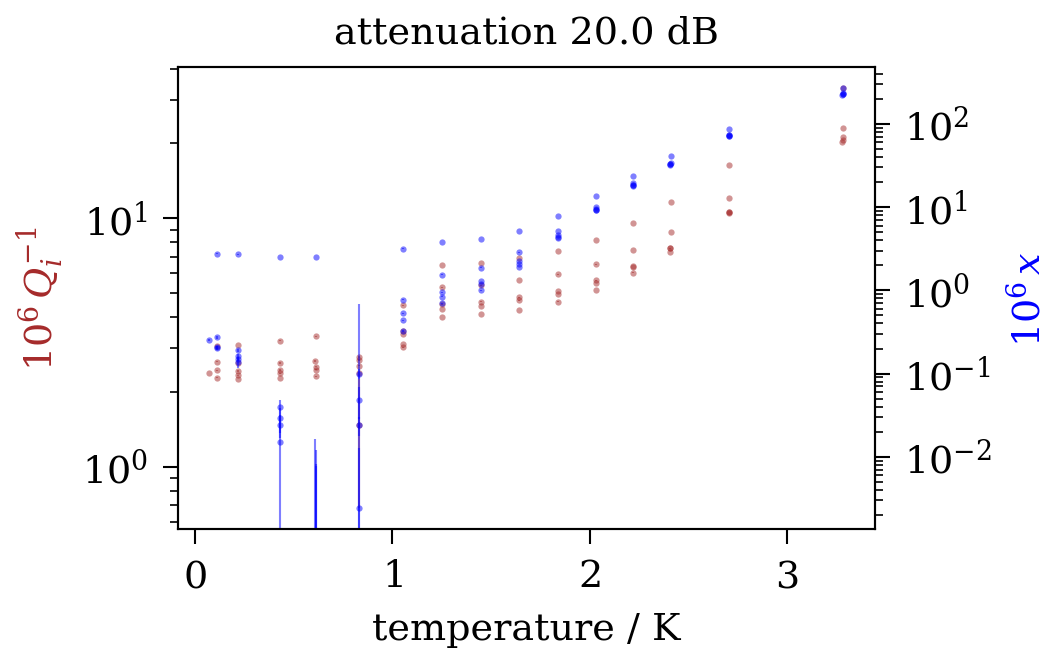

In [10]:
attenuation = 20
fig, i_ax = plt.subplots()
x_ax = i_ax.twinx()
i_ax.set_yscale('log')
x_ax.set_yscale('log')
i_ax.set_xlabel('temperature / K')
i_ax.set_title('attenuation {:.1f} dB'.format(attenuation))
i_ax.set_ylabel('$10^6 \, Q_i^{-1}$', color=i_color)
x_ax.set_ylabel('$10^6 \, x$', color=x_color)
for lo_index in lo_indices:
    df = all_data[(all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    df.x = df.res_f_0.max() / df.res_f_0 - 1
    df.x_error = df.res_f_0_error / df.res_f_0
    i_ax.errorbar(df.stream_temperature_package,
                  1e6 * df.res_loss_i,
                  yerr=1e6 * df.res_loss_i_error,
                  marker='.', linestyle='none', color=i_color, alpha=0.5)
    x_ax.errorbar(df.stream_temperature_package,
                  1e6 * df.x,
                  yerr=1e6 * df.x_error,
                  marker='.', linestyle='none', color=x_color, alpha=0.5)
#i_ax.set_ylim(-1.8, 36)
#x_ax.set_ylim(-18, 360)

(0, 3.6e-05)

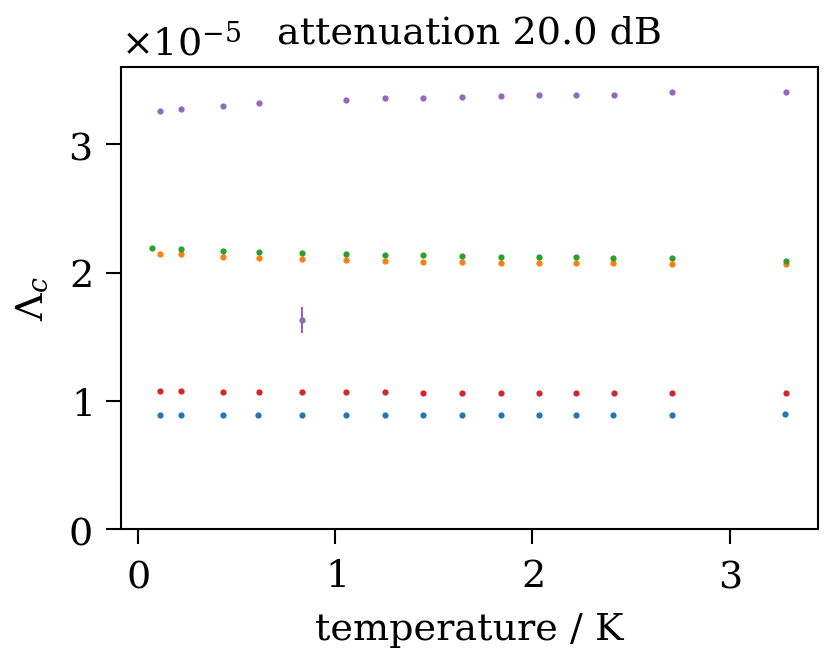

In [15]:
attenuation = 20
fig, ax = plt.subplots()
ax.set_title('attenuation {:.1f} dB'.format(attenuation))
ax.set_xlabel('temperature / K')
ax.set_ylabel('$\Lambda_c$')
for lo_index in lo_indices:
    df = all_data[(all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    ax.errorbar(df.stream_temperature_package, df.res_loss_c, 
                yerr=df.res_loss_c_error, marker='.', linestyle='none')
    
ax.set_ylim(0, 3.6e-5)

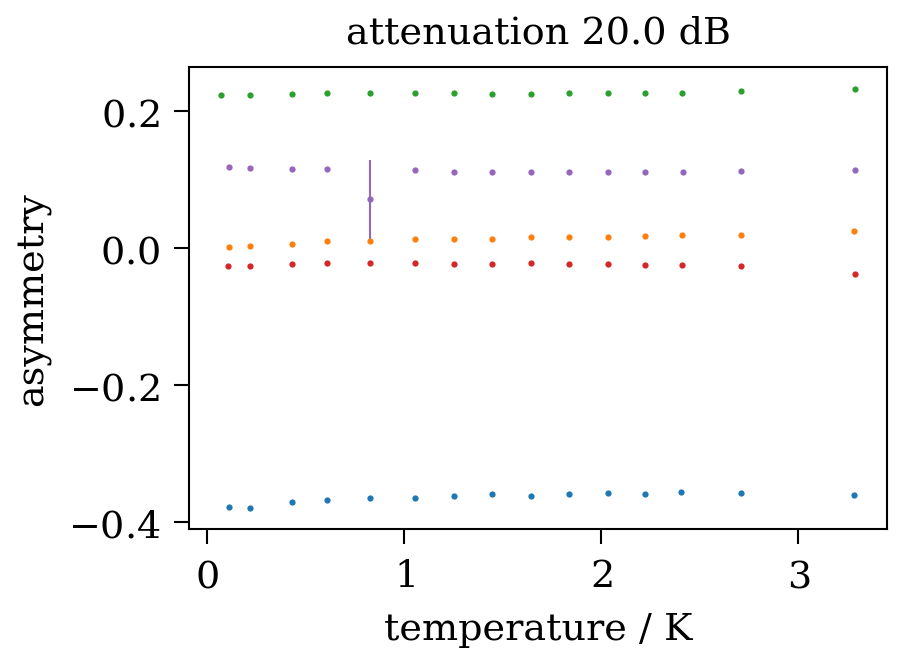

In [16]:
attenuation = 20
fig, ax = plt.subplots()
ax.set_title('attenuation {:.1f} dB'.format(attenuation))
ax.set_xlabel('temperature / K')
ax.set_ylabel('asymmetry')
for lo_index in lo_indices:
    df = all_data[(all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    ax.errorbar(df.stream_temperature_package, df.res_asymmetry, 
                yerr=df.res_asymmetry_error, marker='.', linestyle='none')